#Library and Data Import

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For pairplot visualization
from pandas.plotting import scatter_matrix

# Display options
pd.set_option("display.max_columns", 200)

In [6]:
df = pd.read_csv("C:\\Users\\SAMEER\\Downloads\\CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Initial Data Inspection

In [7]:
df = pd.read_csv("C:\\Users\\SAMEER\\Downloads\\CarPrice_Assignment.csv")
print("Shape of dataset -", df.shape)

Shape of dataset - (205, 26)


In [8]:
df = pd.read_csv("C:\\Users\\SAMEER\\Downloads\\CarPrice_Assignment.csv")
print("\nColumns:", df.columns.tolist())


Columns: ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [9]:
df = pd.read_csv("C:\\Users\\SAMEER\\Downloads\\CarPrice_Assignment.csv")
print("\nHead of data:\n", df.head())


Head of data:
    car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cyli

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

 Data Cleaning and Preprocessing

In [11]:
# chech
# Check null counts with percentage
null_counts = df.isnull().sum()
null_percent = (null_counts / len(df)) * 100
null_summary = pd.DataFrame({"Null Count": null_counts, "Null %": null_percent})
print(null_summary)


                  Null Count  Null %
car_ID                     0     0.0
symboling                  0     0.0
CarName                    0     0.0
fueltype                   0     0.0
aspiration                 0     0.0
doornumber                 0     0.0
carbody                    0     0.0
drivewheel                 0     0.0
enginelocation             0     0.0
wheelbase                  0     0.0
carlength                  0     0.0
carwidth                   0     0.0
carheight                  0     0.0
curbweight                 0     0.0
enginetype                 0     0.0
cylindernumber             0     0.0
enginesize                 0     0.0
fuelsystem                 0     0.0
boreratio                  0     0.0
stroke                     0     0.0
compressionratio           0     0.0
horsepower                 0     0.0
peakrpm                    0     0.0
citympg                    0     0.0
highwaympg                 0     0.0
price                      0     0.0


In [12]:
# Check rows with high NaN count >60% of columns and drop them
df = df.dropna(thresh=df.shape[1] * 0.6)  

In [13]:
# Sort table by Price
df = df.sort_values(by="price", ascending=False).reset_index(drop=True)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0
1,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
2,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
3,129,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.0
4,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0


Data Visualization 

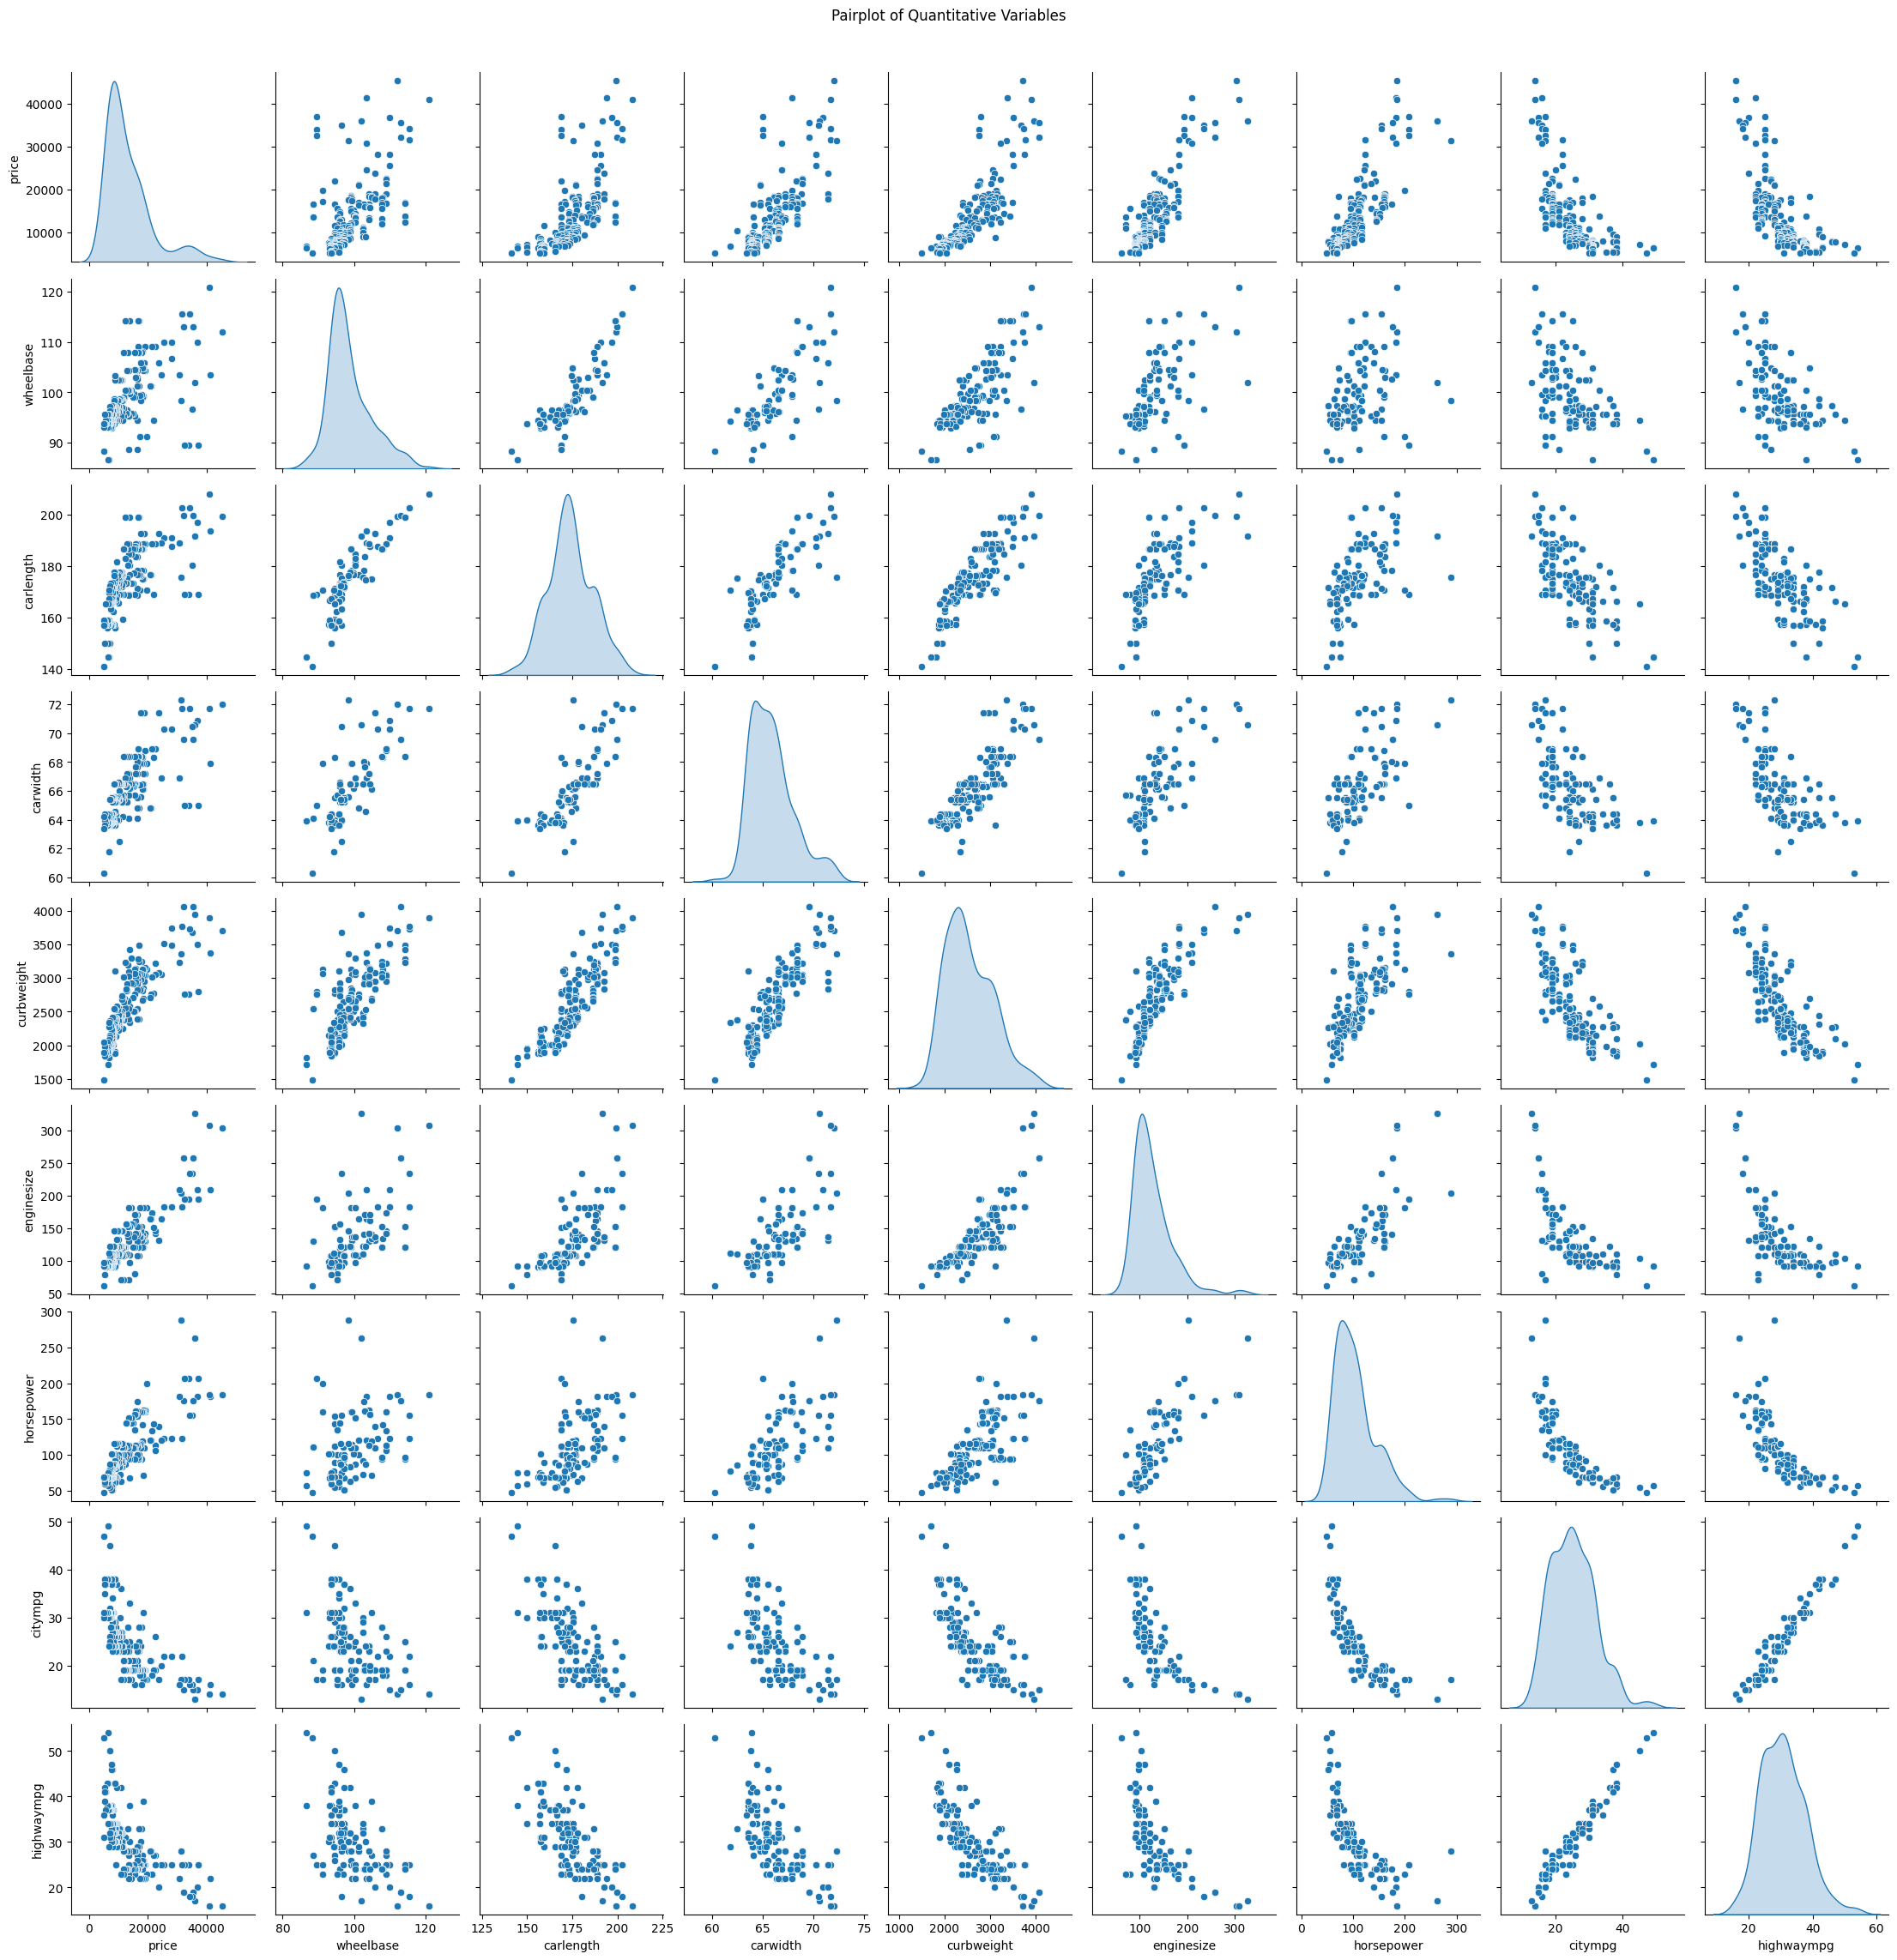

In [14]:
# Pairplot of selected quantitative variables

num_cols = ["price", "wheelbase", "carlength", "carwidth", "curbweight",
            "enginesize", "horsepower", "citympg", "highwaympg"]

# Keep only columns that exist in df
num_cols_existing = [col for col in num_cols if col in df.columns]

# Plot pairplot
sns.pairplot(df[num_cols_existing], diag_kind="kde")
plt.suptitle("Pairplot of Quantitative Variables", y=1.02)
plt.show()


Exploratory Data Analysis (EDA)

In [15]:
 # Drop the unwanted Column
df.drop(columns=["car_ID"], inplace=True, errors="ignore")

In [16]:
# Fix carCompany from CarName
df["carCompany"] = df["CarName"].str.split(" ").str[0].str.lower()

In [17]:
# Fix spelling errors in carCompany
df.replace({
    "carCompany": {
        "maxda": "mazda",
        "porcshce": "porsche",
        "toyouta": "toyota",
        "vokswagen": "volkswagen",
        "vw": "volkswagen",
        "alfa-romero": "alfa-romeo"
    }
}, inplace=True)

In [18]:
# handle categorical variables
categorical_cols = ["fueltype","aspiration","doornumber","carbody",
                    "drivewheel","enginetype","cylindernumber","fuelsystem","carCompany"]

# Keep only columns that exist in df
categorical_cols = [c for c in categorical_cols if c in df.columns]

# Convert categorical columns → dummy variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check first few columns
print("Dummy variables created. First 20 columns:")
print(df.columns[:20])


Dummy variables created. First 20 columns:
Index(['symboling', 'CarName', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two'],
      dtype='object')


In [19]:
# Rename dummy columns for readability
df.rename(columns=lambda x: x.replace("carCompany_", "Company_")
                               .replace("fueltype_", "Fuel_")
                               .replace("carbody_", "Body_")
                               .replace("enginetype_", "Engine_")
                               .replace("cylindernumber_", "Cyl_")
                               .replace("doornumber_", "Door_")
                               .replace("drivewheel_", "Drive_")
                               .replace("fuelsystem_", "FuelSys_")
                               .replace("aspiration_", "Asp_"),
          inplace=True)

# Check renamed columns
print("Renamed dummy columns First 20 columns")
print(df.columns[:20])


Renamed dummy columns First 20 columns
Index(['symboling', 'CarName', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'Fuel_gas', 'Asp_turbo', 'Door_two'],
      dtype='object')


### Feature Engineering

In [20]:
# Feature Engineering
# car_stability = wheelbase / car length
for length_col in ["carlength","length","length_of_car"]:
    if length_col in df.columns:
        df["car_stability"] = df["wheelbase"] / df[length_col]
        break

In [21]:
#  Drop redundant columns

for col in ["carlength","carwidth","curbweight","highwaympg","car_stability"]:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)


In [22]:
# Final Data

print("Shape:", df.shape)
print("Columns:\n", df.columns.tolist())
df.head()

Shape: (205, 62)
Columns:
 ['symboling', 'CarName', 'enginelocation', 'wheelbase', 'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price', 'Fuel_gas', 'Asp_turbo', 'Door_two', 'Body_hardtop', 'Body_hatchback', 'Body_sedan', 'Body_wagon', 'Drive_fwd', 'Drive_rwd', 'Engine_dohcv', 'Engine_l', 'Engine_ohc', 'Engine_ohcf', 'Engine_ohcv', 'Engine_rotor', 'Cyl_five', 'Cyl_four', 'Cyl_six', 'Cyl_three', 'Cyl_twelve', 'Cyl_two', 'FuelSys_2bbl', 'FuelSys_4bbl', 'FuelSys_idi', 'FuelSys_mfi', 'FuelSys_mpfi', 'FuelSys_spdi', 'FuelSys_spfi', 'Company_audi', 'Company_bmw', 'Company_buick', 'Company_chevrolet', 'Company_dodge', 'Company_honda', 'Company_isuzu', 'Company_jaguar', 'Company_mazda', 'Company_mercury', 'Company_mitsubishi', 'Company_nissan', 'Company_peugeot', 'Company_plymouth', 'Company_porsche', 'Company_renault', 'Company_saab', 'Company_subaru', 'Company_toyota', 'Company_volkswagen', 'Company_volvo']


,symboling,CarName,enginelocation,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,Fuel_gas,Asp_turbo,Door_two,Body_hardtop,Body_hatchback,Body_sedan,Body_wagon,Drive_fwd,Drive_rwd,Engine_dohcv,Engine_l,Engine_ohc,Engine_ohcf,Engine_ohcv,Engine_rotor,Cyl_five,Cyl_four,Cyl_six,Cyl_three,Cyl_twelve,Cyl_two,FuelSys_2bbl,FuelSys_4bbl,FuelSys_idi,FuelSys_mfi,FuelSys_mpfi,FuelSys_spdi,FuelSys_spfi,Company_audi,Company_bmw,Company_buick,Company_chevrolet,Company_dodge,Company_honda,Company_isuzu,Company_jaguar,Company_mazda,Company_mercury,Company_mitsubishi,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
0,1,buick regal sport coupe (turbo),front,112.0,55.4,304,3.80,3.35,8.0,184,4500,14,45400.0,True,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,bmw x5,front,103.5,53.7,209,3.62,3.39,8.0,182,5400,16,41315.0,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,buick century special,front,120.9,56.7,308,3.80,3.35,8.0,184,4500,14,40960.0,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,3,porsche boxter,rear,89.5,51.6,194,3.74,2.90,9.5,207,5900,17,37028.0,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,0,bmw x3,front,110.0,56.3,209,3.62,3.39,8.0,182,5400,15,36880.0,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#Data Analysis and Modeling

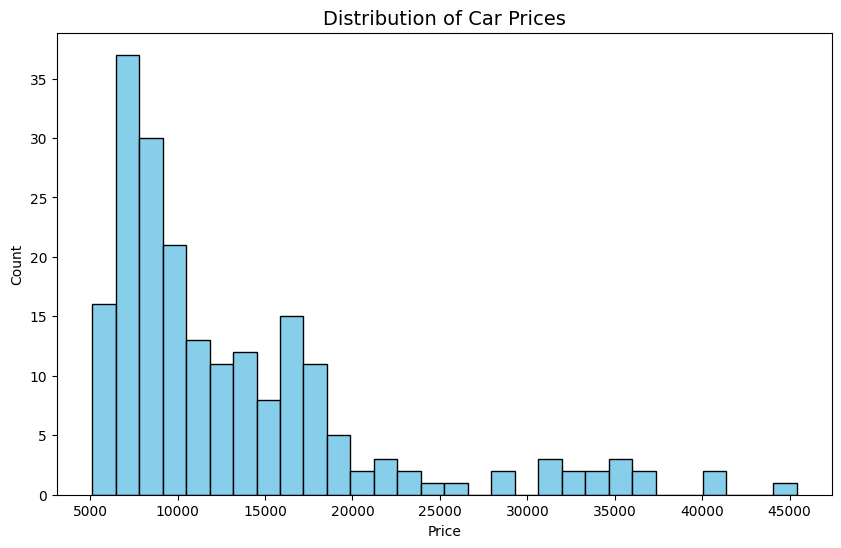

In [28]:
#  Histogram Analysis

plt.figure(figsize=(10,6))
plt.hist(df["price"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Car Prices", fontsize=14)
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


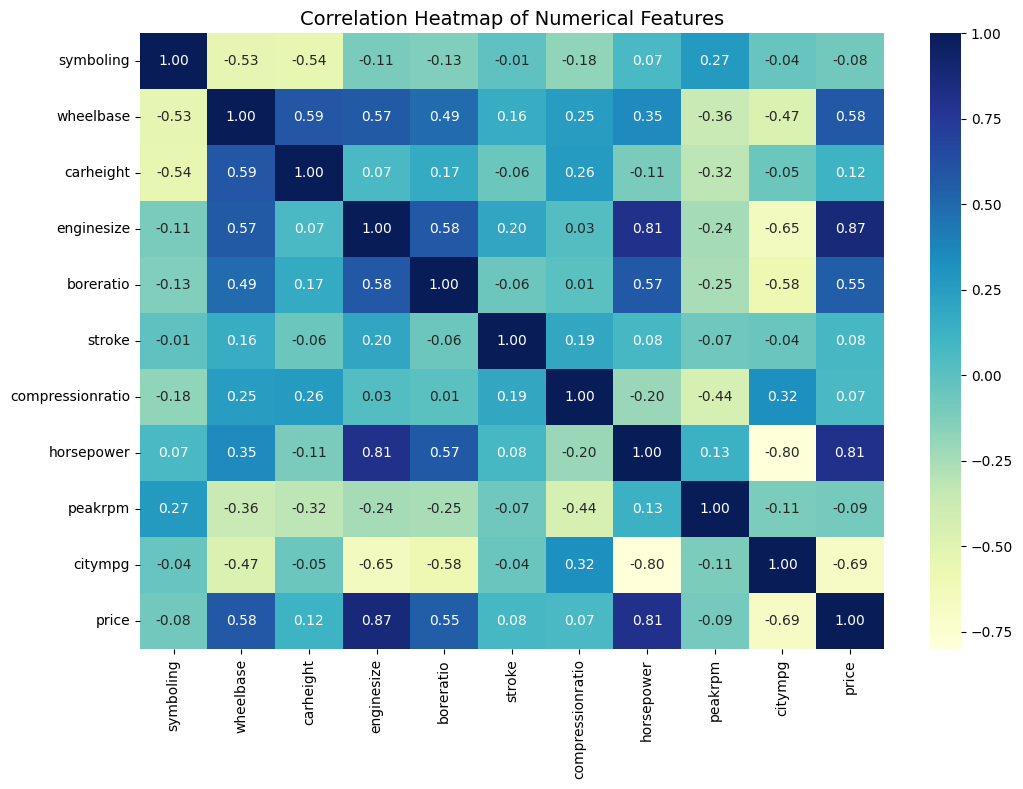

In [24]:
# Step 5: Heatmap of Correlation

# Select only numeric columns
df_numeric = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(12,8))
corr = df_numeric.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

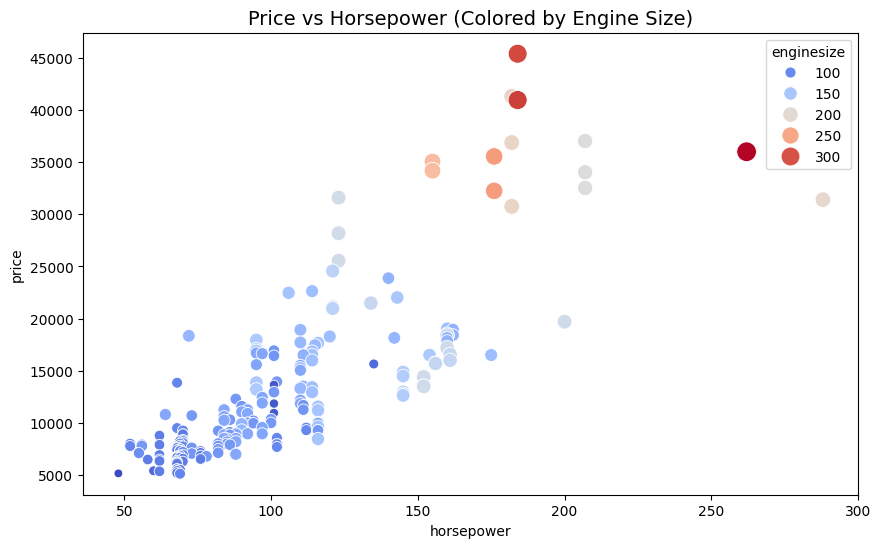

In [25]:
# Step 6: Gradient Style Scatter Plot (Price vs Horsepower)

# Check if required columns exist
if all(col in df.columns for col in ["horsepower", "price", "enginesize"]):
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        data=df,
        x="horsepower",
        y="price",
        hue="enginesize",
        palette="coolwarm",
        size="enginesize",
        sizes=(40,200)
    )
    plt.title("Price vs Horsepower (Colored by Engine Size)", fontsize=14)
    plt.show()
else:
    print("Required columns for scatter plot not found. Skipping.")

In [26]:
# Insights (Text Output)
print("\n--- Insights from Analysis ---")
print("1. Car prices are right-skewed: Most cars are in lower price range, few very expensive cars.")
print("2. Luxury brands (bmw, porsche, jaguar, audi) have much higher average prices than others.")
print("3. Heatmap shows high correlation between 'enginesize', 'horsepower', 'curbweight' and price.")
print("4. Mileage (citympg, highwaympg) has a negative correlation with price → cheaper cars are fuel efficient.")
print("5. Scatter plot shows clear upward trend: as horsepower & engine size increase, price increases.")


--- Insights from Analysis ---
1. Car prices are right-skewed: Most cars are in lower price range, few very expensive cars.
2. Luxury brands (bmw, porsche, jaguar, audi) have much higher average prices than others.
3. Heatmap shows high correlation between 'enginesize', 'horsepower', 'curbweight' and price.
4. Mileage (citympg, highwaympg) has a negative correlation with price → cheaper cars are fuel efficient.
5. Scatter plot shows clear upward trend: as horsepower & engine size increase, price increases.
